<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [2]:
df = pd.read_csv('states_edu.csv')

Chosen test: **<hit `Enter` to edit>**

Math for 4 grade

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [3]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [4]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

In [5]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [6]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [7]:
df.dropna(subset=['AVG_MATH_4_SCORE','YEAR','TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
'CAPITAL_OUTLAY_EXPENDITURE'],inplace=True)
df

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
408,2000_ALABAMA,ALABAMA,2000,730184.0,4885917.0,425978.0,3003814.0,1456125.0,5003267.0,2551713.0,...,59749.0,56951.0,42512.0,472686.0,201358.0,739992.0,217.0,264.0,NaN,NaN
410,2000_ARIZONA,ARIZONA,2000,814807.0,5479168.0,534619.0,2481089.0,2463460.0,5397194.0,2488932.0,...,72295.0,65526.0,49501.0,567626.0,236933.0,877696.0,219.0,269.0,NaN,NaN
411,2000_ARKANSAS,ARKANSAS,2000,450751.0,2844855.0,254735.0,2126099.0,464021.0,2683400.0,1531232.0,...,35724.0,34873.0,28918.0,281091.0,131511.0,449959.0,216.0,257.0,NaN,NaN
412,2000_CALIFORNIA,CALIFORNIA,2000,5941946.0,46628207.0,4024940.0,26877920.0,15725347.0,45829753.0,23514388.0,...,489043.0,441877.0,357789.0,3804640.0,1707952.0,6140814.0,213.0,260.0,NaN,NaN
414,2000_CONNECTICUT,CONNECTICUT,2000,530363.0,5884078.0,234321.0,2298931.0,3350826.0,5605280.0,3189123.0,...,44682.0,42597.0,32591.0,354391.0,155734.0,562179.0,234.0,281.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,96851.0,95221.0,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,82404.0,79483.0,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,19814.0,20426.0,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,60999.0,61084.0,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0


<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [8]:
df['ALL_EXPENDITURE_PER_STUDENT']=df['TOTAL_EXPENDITURE']/df['ENROLL_ALL']
df['INSTRUCTION_EXPENDITURE_PER_STUDENT']=df['INSTRUCTION_EXPENDITURE']/df['ENROLL_ALL']
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT']=df['SUPPORT_SERVICES_EXPENDITURE']/df['ENROLL_ALL']
df['OTHER_EXPENDITURE_PER_STUDENT']=df['OTHER_EXPENDITURE']/df['ENROLL_ALL']
df['CAPITAL_OUTLAY_EXPENDITURE_PER_STUDENT']=df['CAPITAL_OUTLAY_EXPENDITURE']/df['ENROLL_ALL']
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,ALL_EXPENDITURE_PER_STUDENT,INSTRUCTION_EXPENDITURE_PER_STUDENT,SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT,OTHER_EXPENDITURE_PER_STUDENT,CAPITAL_OUTLAY_EXPENDITURE_PER_STUDENT
408,2000_ALABAMA,ALABAMA,2000,730184.0,4885917.0,425978.0,3003814.0,1456125.0,5003267.0,2551713.0,...,739992.0,217.0,264.0,NaN,NaN,6.761245,3.448298,1.782523,0.535018,0.897176
410,2000_ARIZONA,ARIZONA,2000,814807.0,5479168.0,534619.0,2481089.0,2463460.0,5397194.0,2488932.0,...,877696.0,219.0,269.0,NaN,NaN,6.149275,2.835756,1.792839,0.308388,0.875502
411,2000_ARKANSAS,ARKANSAS,2000,450751.0,2844855.0,254735.0,2126099.0,464021.0,2683400.0,1531232.0,...,449959.0,216.0,257.0,NaN,NaN,5.963654,3.403048,1.787392,0.307184,0.325954
412,2000_CALIFORNIA,CALIFORNIA,2000,5941946.0,46628207.0,4024940.0,26877920.0,15725347.0,45829753.0,23514388.0,...,6140814.0,213.0,260.0,NaN,NaN,7.463140,3.829197,2.024010,0.369593,0.952551
414,2000_CONNECTICUT,CONNECTICUT,2000,530363.0,5884078.0,234321.0,2298931.0,3350826.0,5605280.0,3189123.0,...,562179.0,234.0,281.0,NaN,NaN,9.970632,5.672789,2.908127,0.321319,0.656869


Final feature list: **<LIST FEATURES HERE\>**
* 'AVG_MATH_4_SCORE';
* 'ALL_EXPENDITURE_PER_STUDENT';
* 'INSTRUCTION_EXPENDITURE_PER_STUDENT'
* 'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'
* 'OTHER_EXPENDITURE_PER_STUDENT'
* 'CAPITAL_OUTLAY_EXPENDITURE_PER_STUDENT'
* 'YEAR'


Feature selection justification: **<BRIEFLY DESCRIBE WHY YOU PICKED THESE FEATURES\>**

to find the relationship between expenditure and scores. 
Also compare the expenditure of different types as year goes on.

<h2> EDA </h2>

Visualization 1

Text(0, 0.5, 'average of 4th grade math score')

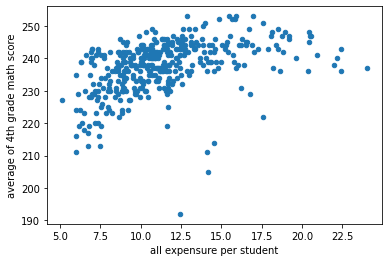

In [9]:
df.plot.scatter(x='ALL_EXPENDITURE_PER_STUDENT', y ='AVG_MATH_4_SCORE')
plt.xlabel('all expensure per student')
plt.ylabel('average of 4th grade math score')

**<CAPTION FOR VIZ 1>**
Generally, more expensure per student have, higher math scores of aveerage of 4th grade math will be.


Visualization 2

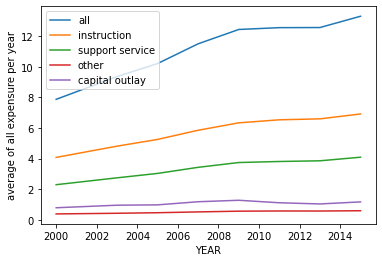

In [21]:
df.groupby('YEAR').ALL_EXPENDITURE_PER_STUDENT.mean().plot(label='all')
df.groupby('YEAR').INSTRUCTION_EXPENDITURE_PER_STUDENT.mean().plot(label='instruction')
df.groupby('YEAR').SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT.mean().plot(label='support service')
df.groupby('YEAR').OTHER_EXPENDITURE_PER_STUDENT.mean().plot(label='other')
df.groupby('YEAR').CAPITAL_OUTLAY_EXPENDITURE_PER_STUDENT.mean().plot(label='capital outlay')

plt.xlabel('YEAR')
plt.ylabel('average of all expensure per year')
plt.legend()







**<CAPTION FOR VIZ 2>**
The average of all expensure per student every year keeps rising. So as that of instruction and supportive service
The highest is the instruction, the second highest is supportive service and the third highest is capital outlay. The rest of the expenditure per student is less than all other types of that.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df[['ALL_EXPENDITURE_PER_STUDENT']].dropna()
y = df['AVG_MATH_4_SCORE']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [14]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [15]:
# create your model here
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

In [18]:
model.score(X_test, y_test)

0.13920562727088548

Text(0, 0.5, 'average 4th grade math score')

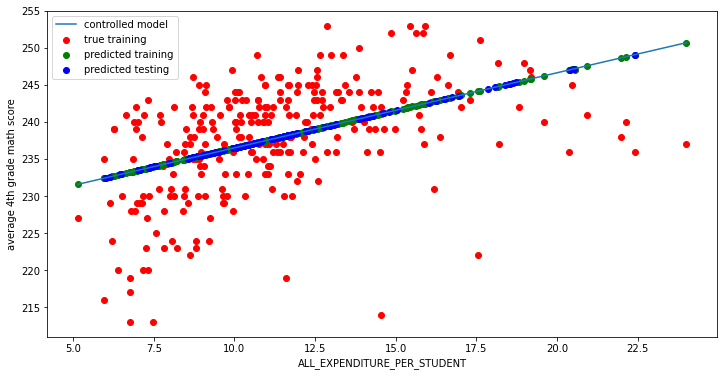

In [19]:
# for regression: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'ALL_EXPENDITURE_PER_STUDENT'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('average 4th grade math score')

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK AND FINDINGS\>**

**Goals**
* My goal is to find the relationship between expenditure and scores. 
* Also compare the expenditure of different types as year goes on.

**cleanup and feature selection**
* To do so, for the column 'AVG_MATH_4_SCORE','YEAR','TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
'CAPITAL_OUTLAY_EXPENDITURE', I drop all the NAN.

* Then divide the expenditure by the amount of students enrolled.

**EDA, ML and findings**
* In the first graphic and marching learning graphic, I want to show the relationship between all expenditure per student with
4th grade math scores. I think they have positive relationship.

* The average of all expensure per student every year keeps rising. So as that of instruction and supportive service
The highest is the instruction, the second highest is supportive service and the third highest is capital outlay. The rest of the expenditure per student is less than all other types of that.
